In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigmart-sales-data/Train.csv
/kaggle/input/bigmart-sales-data/Test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('../input/bigmart-sales-data/Train.csv')

In [4]:
print("Train shape:",df_train.shape)

Train shape: (8523, 12)


In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
categorical_df = df_train.select_dtypes(include='object')
numerical_df = df_train.select_dtypes(exclude='object')
print(f"There are {len(categorical_df.columns)} Categorical attributes")
print(f"There are {len(numerical_df.columns)} Numerical attributes")
      

There are 7 Categorical attributes
There are 5 Numerical attributes


In [8]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
xdf = df_train.copy()

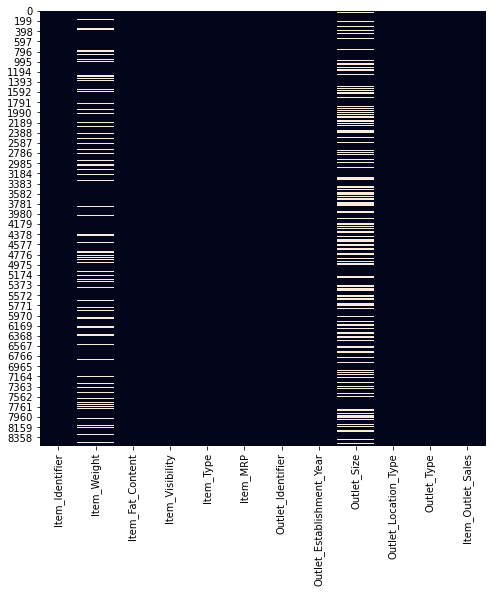

In [10]:
#Tracing Missing values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(xdf.isnull(),cbar=False);

In [11]:
#Lets list them out
total = xdf.isnull().sum().sort_values(ascending=False)
percent = ((xdf.isnull().sum()/xdf.shape[0])*100).sort_values(ascending=False)
percent = np.round(percent,3)
types = xdf[percent.index].dtypes
missing_data = pd.concat([total,percent,types],axis=1,keys = ["Total","Percent","Type"])
missing_data.head(5)

,Total,Percent,Type
Outlet_Size,2410,28.276,object
Item_Weight,1463,17.165,float64
Item_Identifier,0,0.000,object
Item_Fat_Content,0,0.000,object
Item_Visibility,0,0.000,float64


In [12]:
#filling na's
xdf['Outlet_Size'].fillna(xdf['Outlet_Size'].mode()[0],inplace=True)
xdf['Item_Weight'].fillna(xdf['Item_Weight'].median(),inplace=True)
xdf.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
xdf.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
#Univariate Analysis
xdf['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

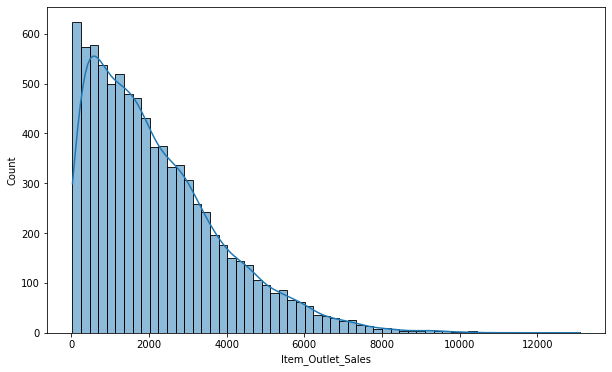

In [15]:
#To check the distribution of target variables
plt.figure(figsize=(10,6))
sns.histplot(data=xdf,x='Item_Outlet_Sales',kde=True);

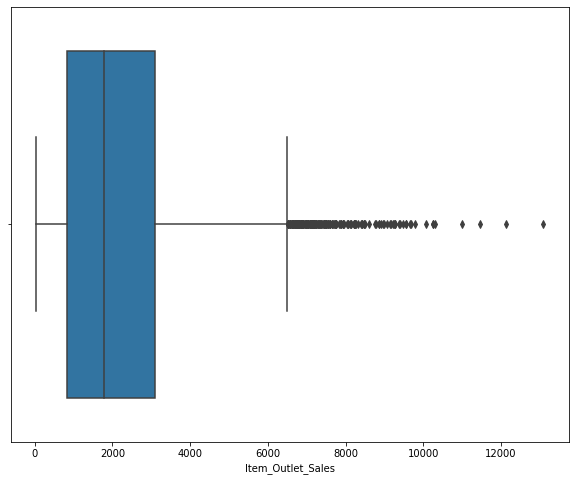

In [16]:
#To check the outliers in target variables
plt.figure(figsize=(10,8))
sns.boxplot(x='Item_Outlet_Sales',data=xdf);

We have notice that the target variable has some outliers.

In [17]:
def remove_outliers(dataframe, column):
    
    Q3 = dataframe[column].quantile(0.75)
    Q1 = dataframe[column].quantile(0.25)
    
    IQR = Q3 - Q1
    
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    df_no_outlier = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]

    return df_no_outlier

In [18]:

xdf = remove_outliers(xdf, "Item_Outlet_Sales")

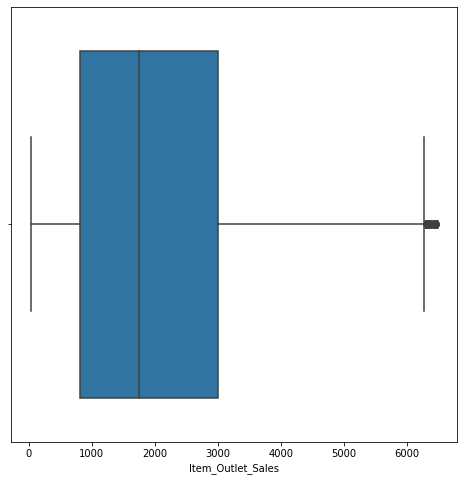

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Item_Outlet_Sales',data=xdf);

In [20]:
#function for fixing skewness

def sqrt_transformation(dataframe):
    return np.sqrt(dataframe)

In [21]:
xdf['Item_Outlet_Sales'] = xdf['Item_Outlet_Sales'].map(sqrt_transformation)

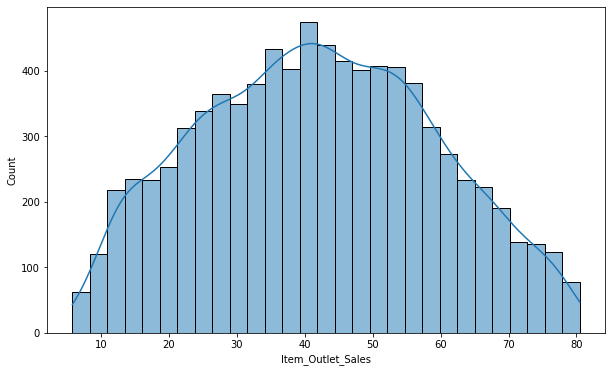

In [22]:
plt.figure(figsize = (10,6))
sns.histplot(data = xdf, x = 'Item_Outlet_Sales', kde = True);

In [23]:
#Univariate Ananlysis(Independent variables)

xxdf = xdf.copy()

In [24]:
numerical_df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

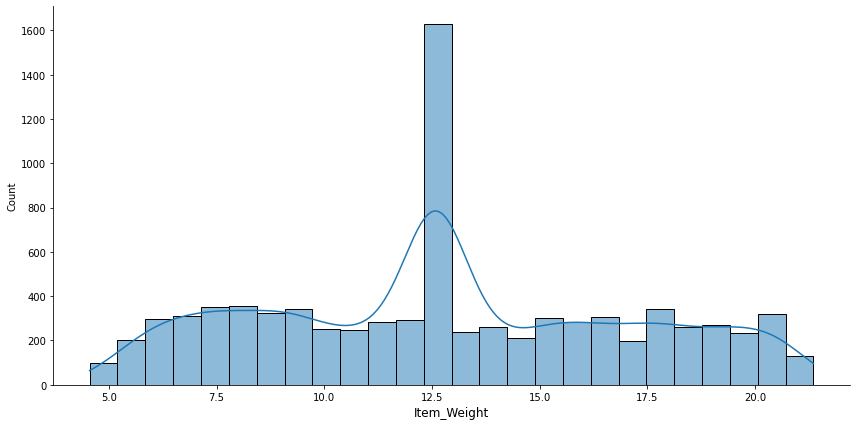

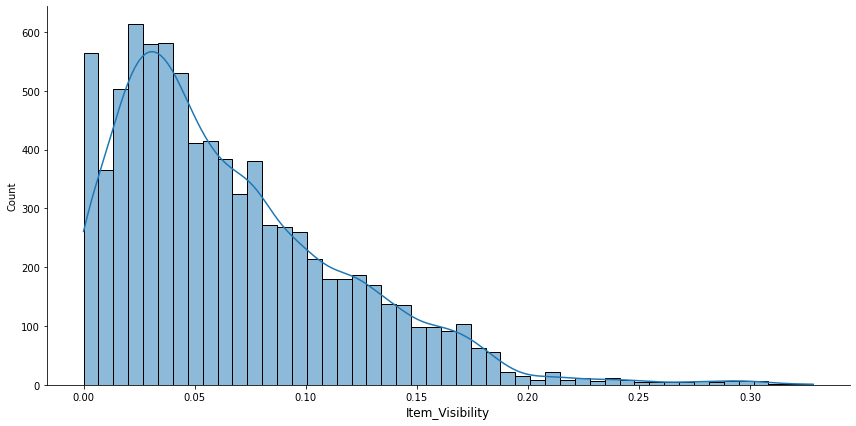

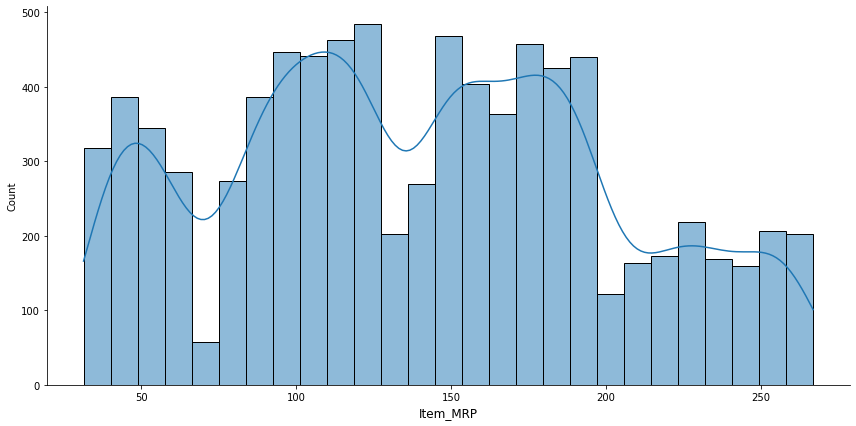

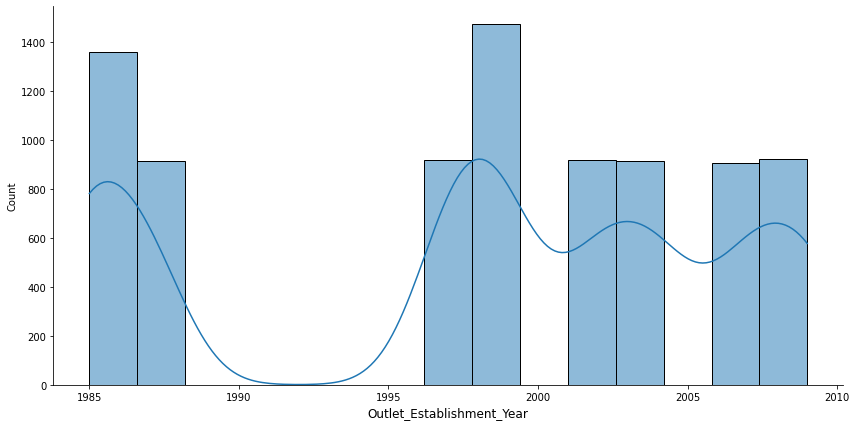

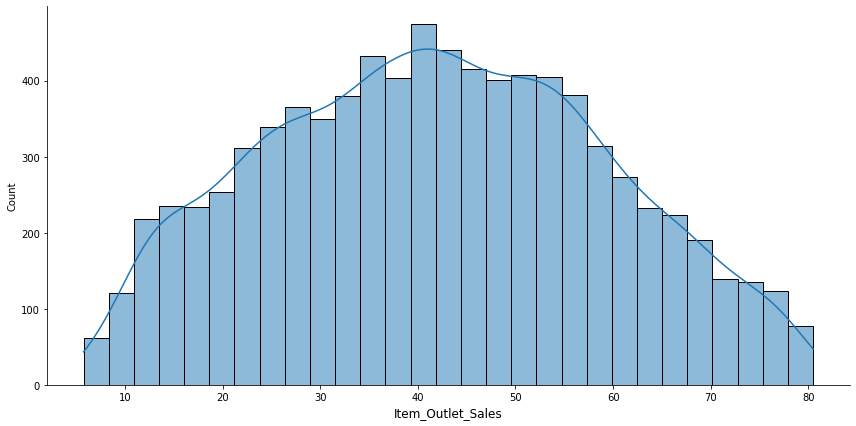

In [25]:
for i in numerical_df:
    sns.displot(data = xxdf, x = i, kde = True, aspect = 2, height = 6);
    plt.xlabel(i, fontsize = 12)

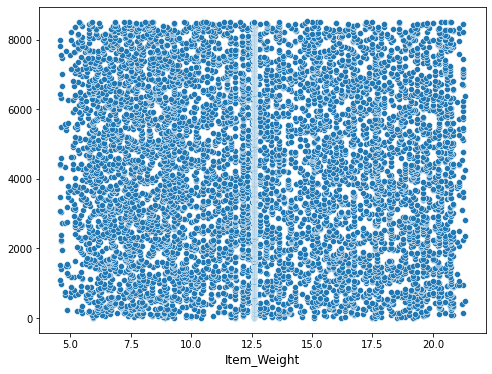

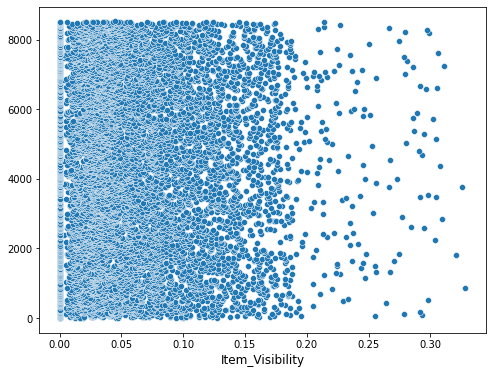

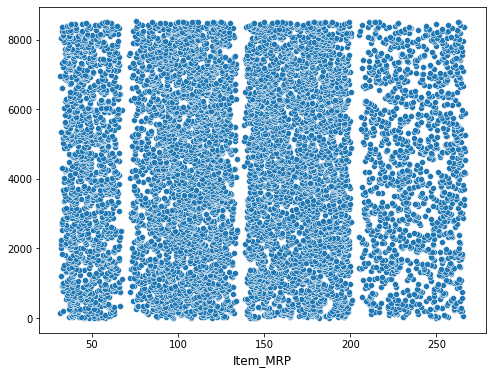

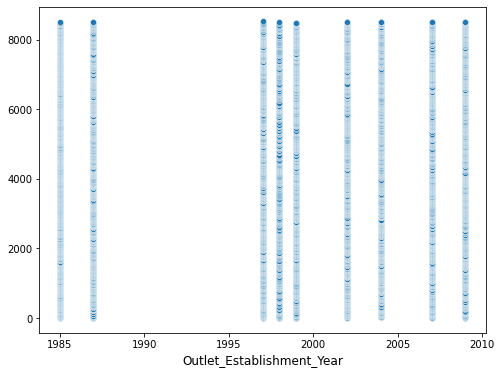

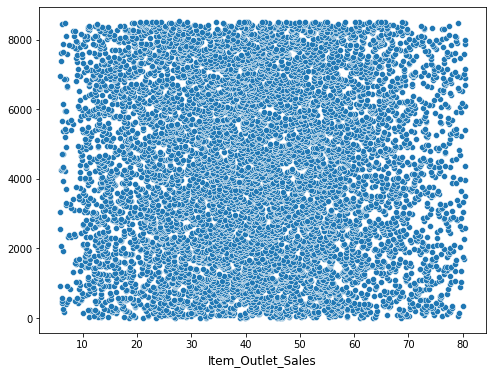

In [26]:
#checking for ouliers

for i in numerical_df:
    plt.figure(figsize = (8,6))
    sns.scatterplot(data = xxdf, y = xdf.index, x = i);
    plt.xlabel(i, fontsize = 12)

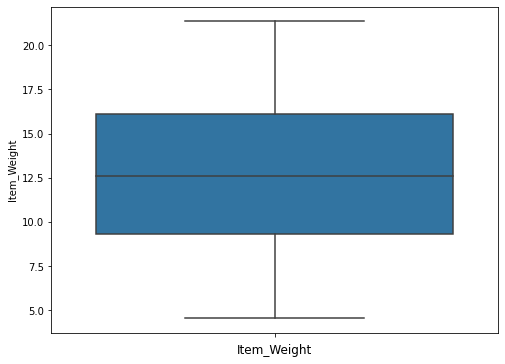

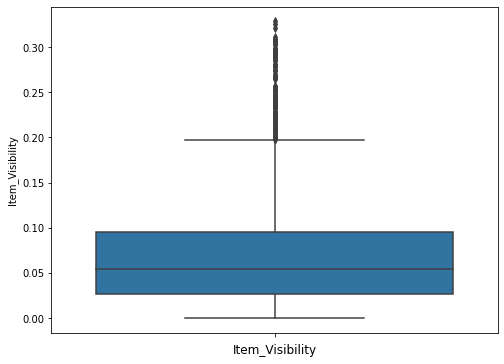

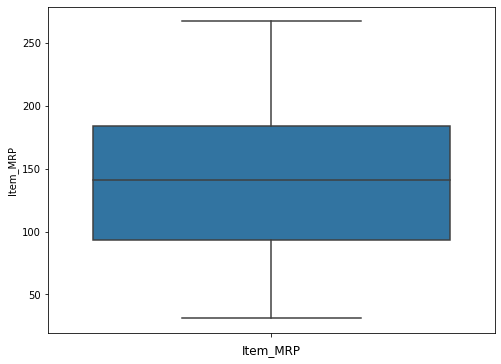

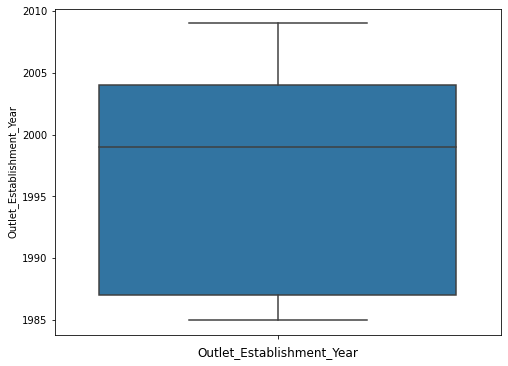

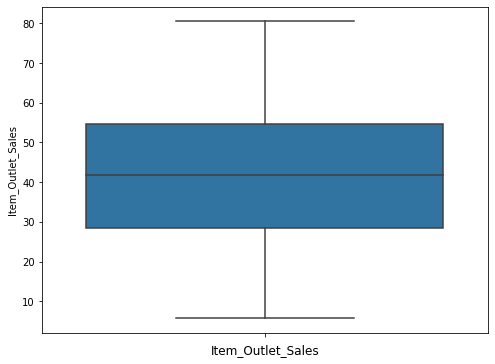

In [27]:
#confirming the outliers

for i in numerical_df:
    plt.figure(figsize=(8,6))
    sns.boxplot(data = xxdf, y = i);
    plt.xlabel(i, fontsize = 12)
    

**Observations:

Item_Visibility contains outliers, and as well as it is positively skewed on both the dastaset. Let's fix this.**

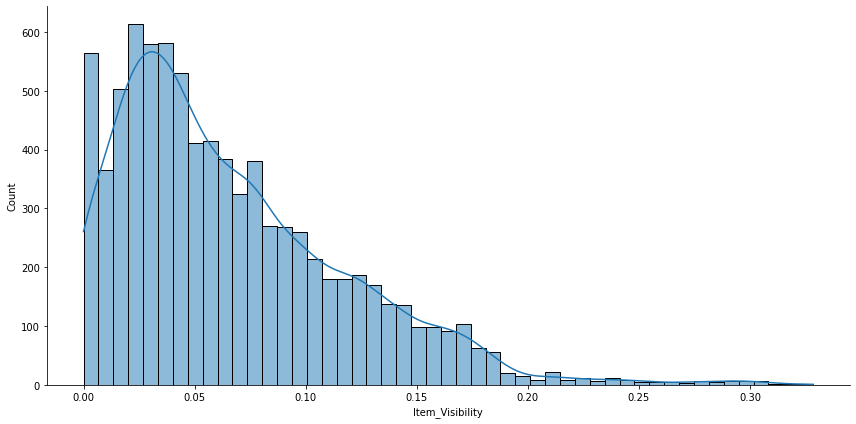

In [28]:
sns.displot(data = xxdf, x = 'Item_Visibility', kde = True, aspect = 2, height = 6);

In [29]:
#removing 0

xxdf['Item_Visibility'].replace(0, xxdf['Item_Visibility'].median(), inplace = True )

In [30]:
#treating positive skewness

xxdf['Item_Visibility'] = xxdf['Item_Visibility'].map(sqrt_transformation)

In [31]:
#removing outliers

xxdf = remove_outliers(xxdf, 'Item_Visibility')

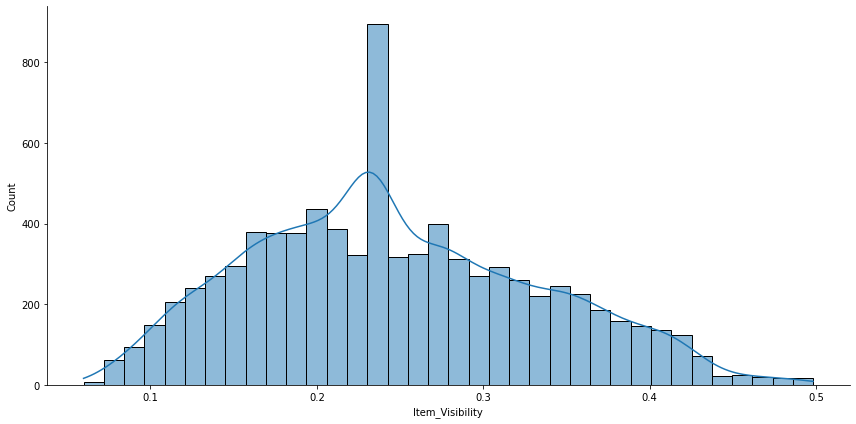

In [32]:
sns.displot(x = 'Item_Visibility', data = xxdf, aspect = 2, height = 6, kde = True);

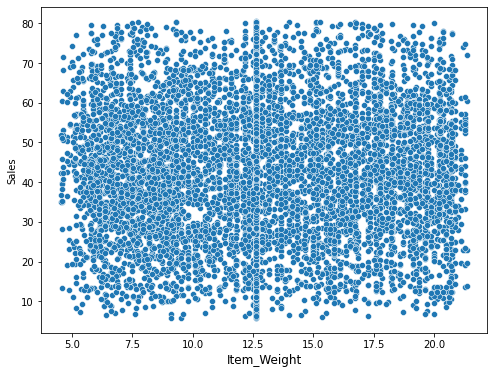

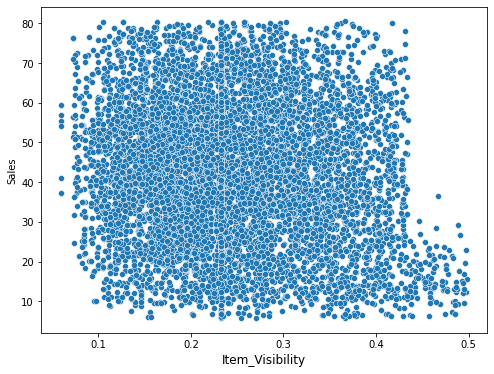

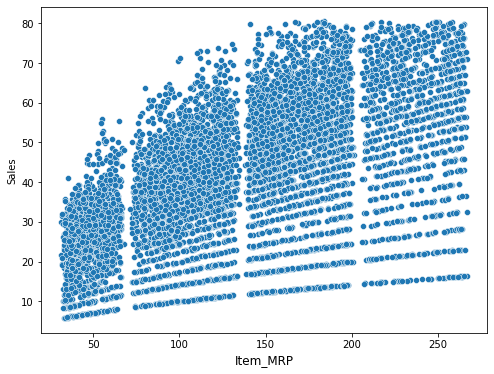

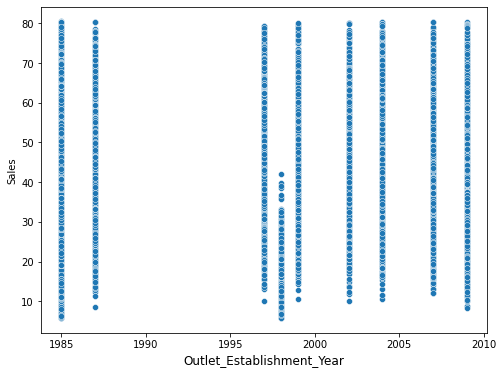

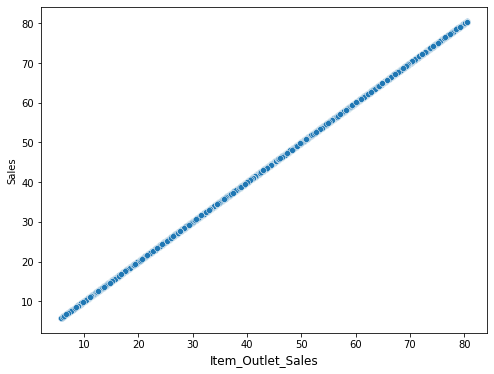

In [33]:
#Bivariate Analysis : First let's see the scatter plot of all the Numerical variables in term of Item_Outlet_Sales

for i in numerical_df:
    plt.figure(figsize = (8,6))
    sns.scatterplot(data = xxdf, x = i, y = xxdf['Item_Outlet_Sales']);
    plt.xlabel(i, fontsize = 12)
    plt.ylabel("Sales")

We observe, Item_MRP has linear relationship


In [34]:
bi_df = xxdf.copy()

In [35]:
#Bivariate(Categorical)

categorical_df.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

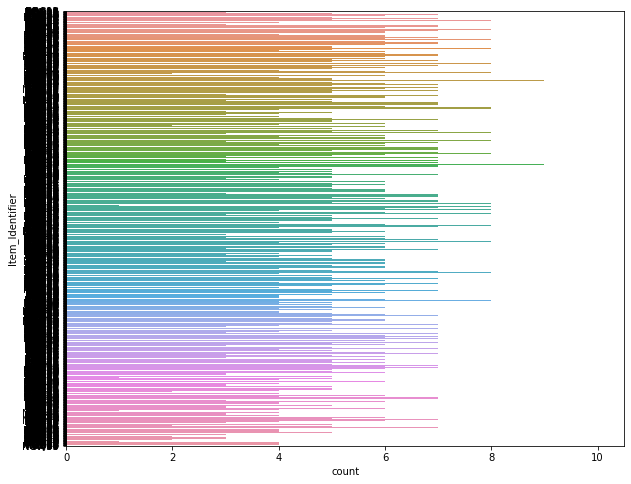

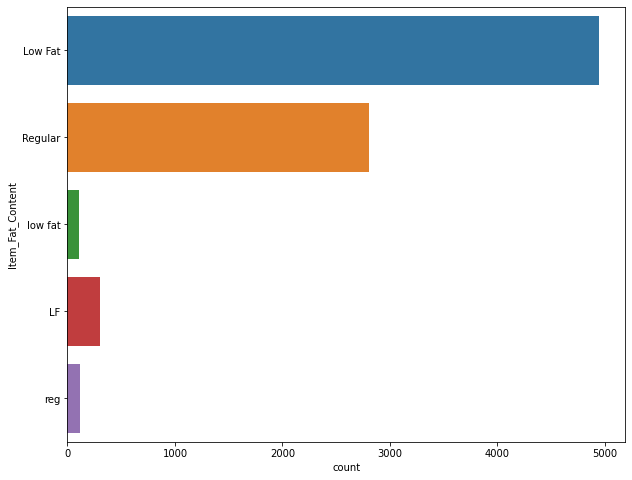

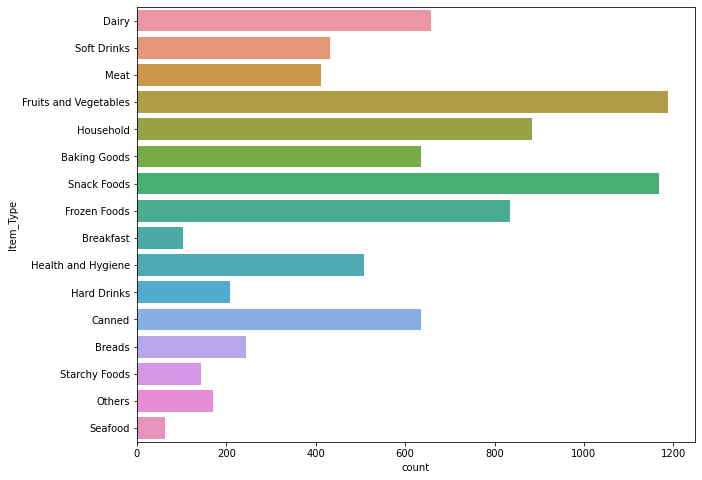

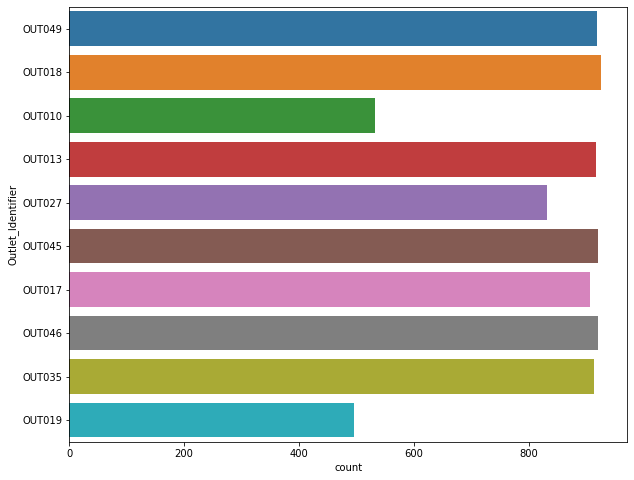

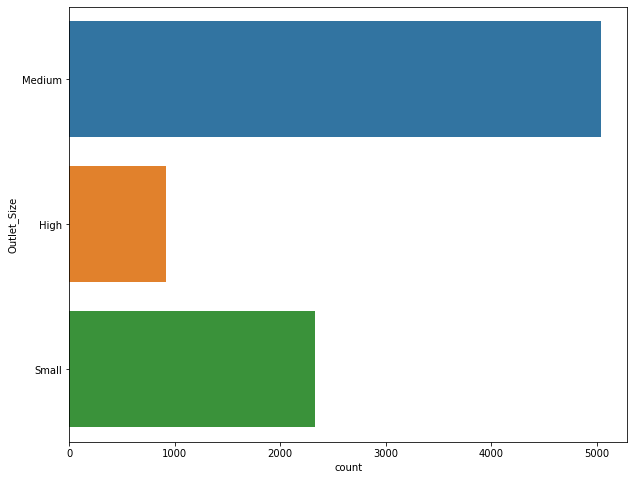

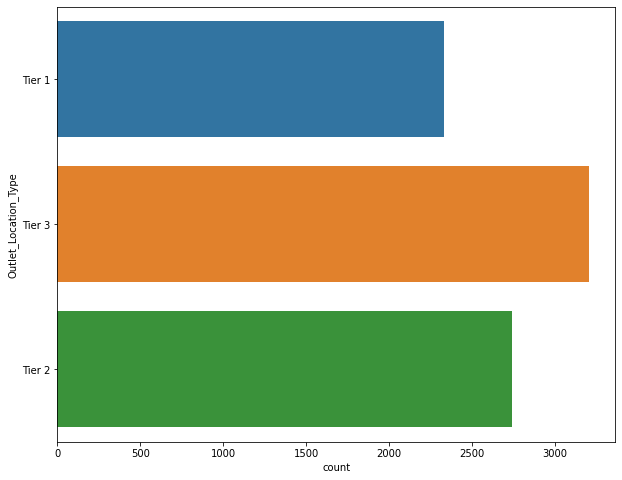

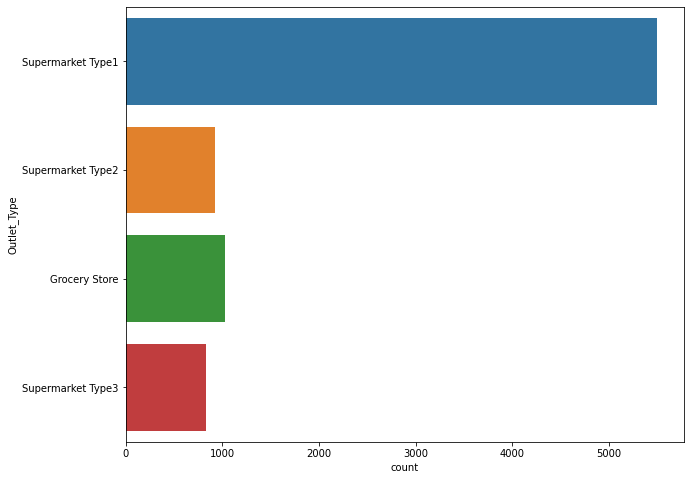

In [36]:
for i in categorical_df:
    plt.figure(figsize = (10,8))
    sns.countplot(y = i, data = bi_df);

Observations:

Item Identifier: There are lot of individual Item Identifiers.

Item_Fat_Content: We have multiple same values, let's fix it.

Fruits & Vegies, Frozen food, Dariy, Household and Snacks has highest number of counts.

Supermarket has higher number of counts.

First let's fix, Item_Fat_Content

In [37]:
bi_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [38]:
bi_df['Item_Fat_Content'] = bi_df['Item_Fat_Content'].map({"low fat": "Low Fat",
                                                           "Low Fat": "Low Fat",
                                                         "LF":"Low Fat",
                                                         "Regular":"Regular",
                                                         "reg":"Regular"})

In [39]:
bi_df['Item_Fat_Content'].value_counts()

Low Fat    5359
Regular    2923
Name: Item_Fat_Content, dtype: int64

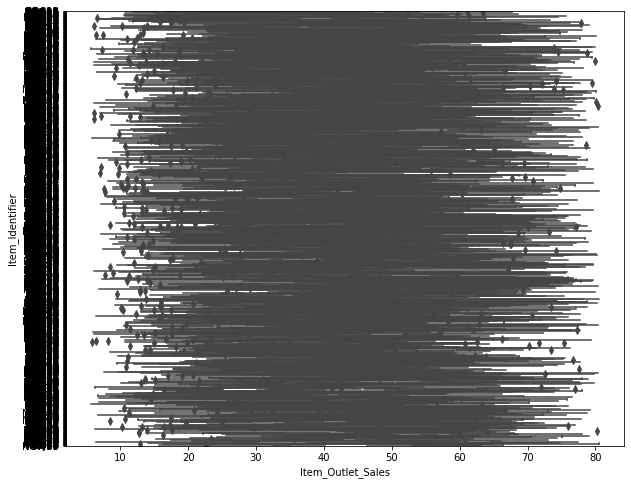

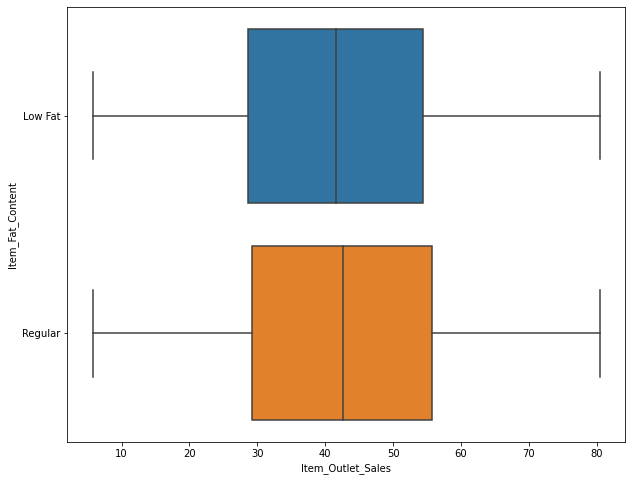

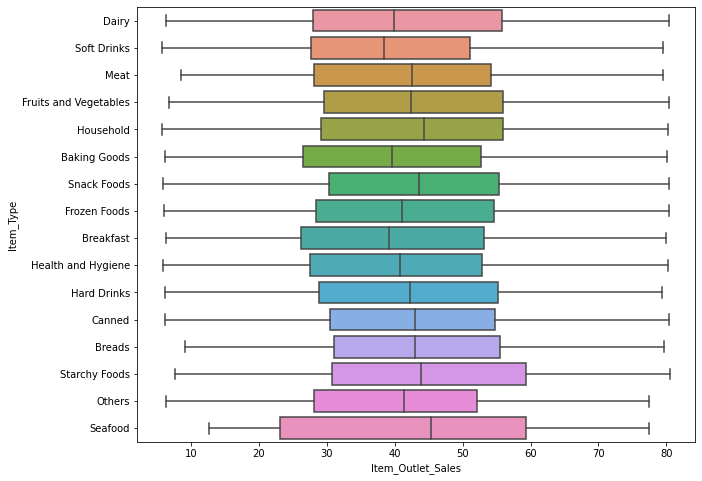

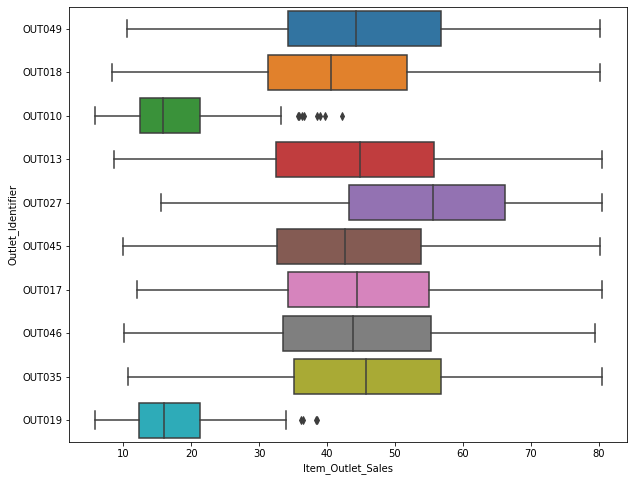

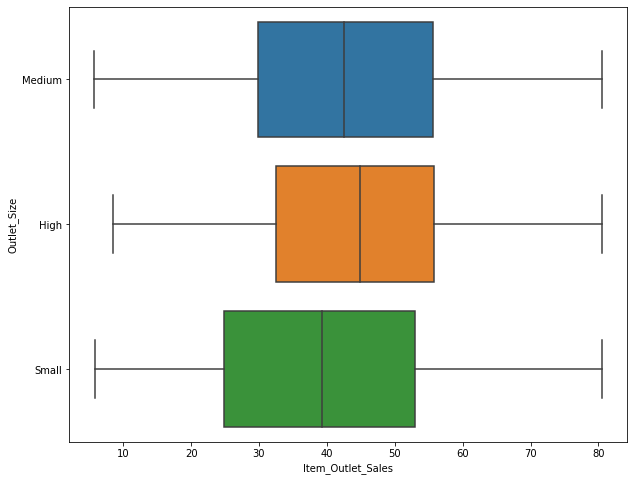

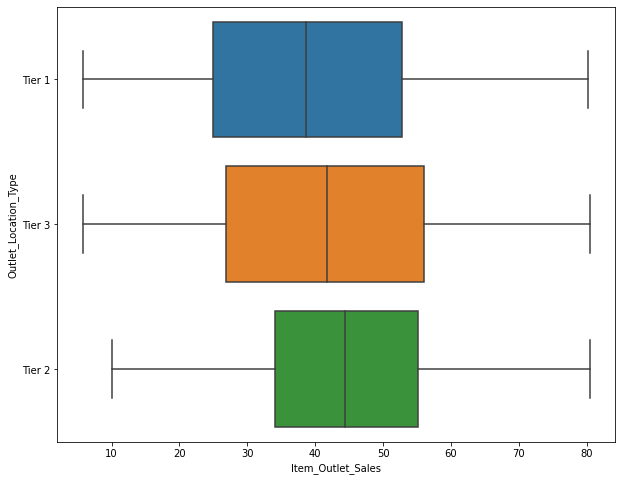

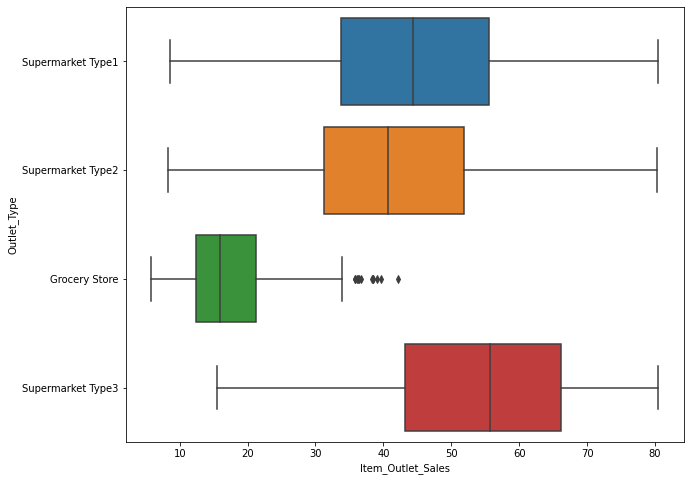

In [40]:
for i in categorical_df:
    plt.figure(figsize = (10,8))
    sns.boxplot(y = i, x = bi_df['Item_Outlet_Sales'], data = bi_df);

Observations:

In terms of 'Outlet_Type', Supermarket has highest demand (Type1 and Type3)

Starchy Food, Dairy, Fruits & Vegetables and Households has highest sales. But most of them all equal in terms of overall sales.

In [41]:
#skewness and kurtosis on numbers

for i in numerical_df:
    print("\n")
    print(i)
    print("-" * 20)
    print("Skewness: %f" % bi_df[i].skew())
    print("Kurtosis: %f" % bi_df[i].kurt())
    print("-" * 20)



Item_Weight
--------------------
Skewness: 0.117195
Kurtosis: -0.889020
--------------------


Item_Visibility
--------------------
Skewness: 0.329221
Kurtosis: -0.513008
--------------------


Item_MRP
--------------------
Skewness: 0.150389
Kurtosis: -0.855955
--------------------


Outlet_Establishment_Year
--------------------
Skewness: -0.427368
Kurtosis: -1.154903
--------------------


Item_Outlet_Sales
--------------------
Skewness: 0.055352
Kurtosis: -0.767968
--------------------


In [42]:
tf_df = bi_df.copy()

In [43]:
#data transformation
#label encoding

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
categorical_df = tf_df.select_dtypes(include = 'object')

In [44]:
label_df = tf_df.copy()
for i in categorical_df:
    label_df[i] = label_encoder.fit_transform(tf_df[i])

<AxesSubplot:>

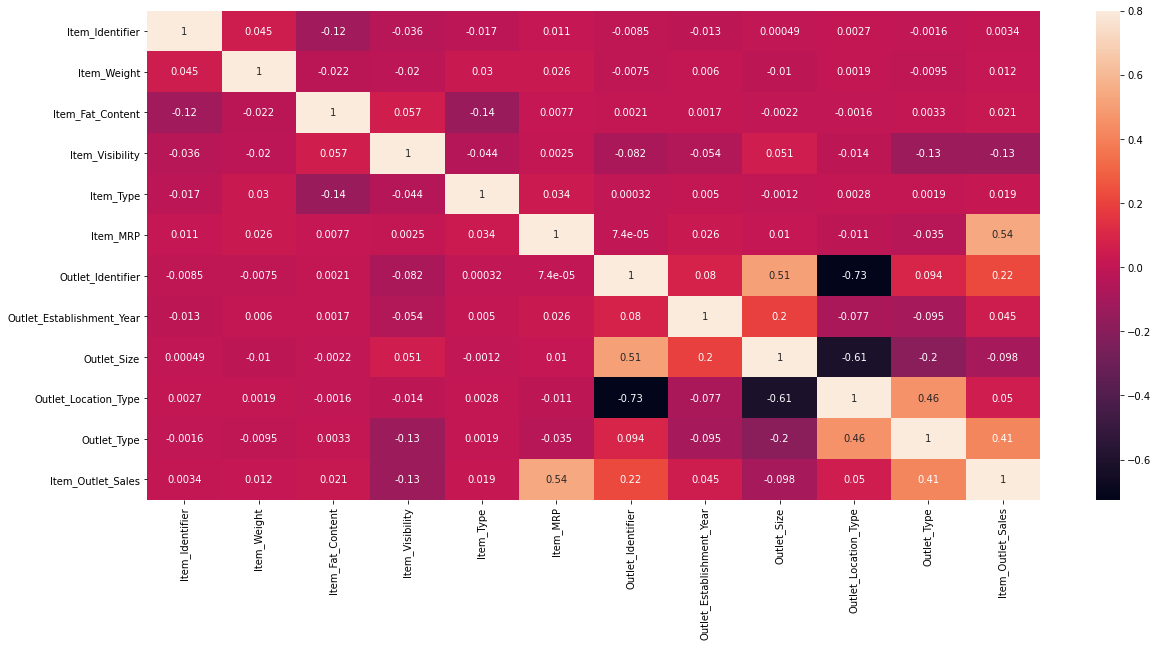

In [45]:
#correlation

f, ax = plt.subplots(figsize = (20,9))
sns.heatmap(label_df.corr(), vmax = 0.8, annot = True)

In [46]:
#dropping unrelated columns

drop_columns = ['Item_Visibility','Outlet_Size','Outlet_Establishment_Year','Outlet_Type','Item_Weight','Item_Identifier']
tf_df.drop(drop_columns, axis = 1, inplace = True)

In [47]:
tf_df

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Location_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,OUT049,Tier 1,61.115775
1,Regular,Soft Drinks,48.2692,OUT018,Tier 3,21.057607
2,Low Fat,Meat,141.6180,OUT049,Tier 1,45.795961
3,Regular,Fruits and Vegetables,182.0950,OUT010,Tier 3,27.062520
4,Low Fat,Household,53.8614,OUT013,Tier 3,31.538947
...,...,...,...,...,...,...
8518,Low Fat,Snack Foods,214.5218,OUT013,Tier 3,52.710373
8519,Regular,Baking Goods,108.1570,OUT045,Tier 2,23.436830
8520,Low Fat,Health and Hygiene,85.1224,OUT035,Tier 2,34.541477
8521,Regular,Snack Foods,103.1332,OUT018,Tier 3,42.960419


In [49]:
#One hot encoding
tf_df = pd.get_dummies(tf_df)
tf_df

,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,249.8092,61.115775,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
1,48.2692,21.057607,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,141.6180,45.795961,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,182.0950,27.062520,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,53.8614,31.538947,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,214.5218,52.710373,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8519,108.1570,23.436830,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8520,85.1224,34.541477,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8521,103.1332,42.960419,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [50]:
#Preparing the dataset
X = tf_df.drop(['Item_Outlet_Sales'], axis = 1)
y = tf_df['Item_Outlet_Sales']

In [51]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)

In [52]:
X.head()

,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,1.796967,0.738537,-0.738537,-0.288165,-0.173861,-0.111667,-0.288165,3.406726,-0.334852,-0.409426,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,2.830542,1.596376,-0.703332,-0.794935
1,-1.476382,-1.354027,1.354027,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,-0.409426,...,2.820197,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,-0.353289,-0.626419,-0.703332,1.257965
2,0.039760,0.738537,-0.738537,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,-0.409426,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,2.830542,1.596376,-0.703332,-0.794935
3,0.697175,-1.354027,1.354027,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,2.442441,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,-0.353289,-0.626419,-0.703332,1.257965
4,-1.385555,0.738537,-0.738537,-0.288165,-0.173861,-0.111667,-0.288165,-0.293537,-0.334852,-0.409426,...,-0.354585,-0.252126,-0.334182,-0.352207,-0.353505,-0.353505,-0.353289,-0.626419,-0.703332,1.257965


In [53]:
#Spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6625, 32), (1657, 32), (6625,), (1657,))

In [54]:
#Modeling and evaluation metrics : Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math


lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [55]:
lr_predict = lr.predict(X_test)

In [56]:
yp = lr.predict(X_test)
print("R2 Score:", r2_score(y_test, lr_predict))
print("Mean Squarred Error:", mean_squared_error(y_test, lr_predict))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_predict)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_predict)))

R2 Score: 0.6256214275605179
Mean Squarred Error: 109.1578232600681
RMSE: 10.447862138259104
Mean Absolute Error : 8.234854540284836
